#Adjustable Final Variables

In [157]:
### FILE DATA FOR TRAINING

# Train_Filename: Filepath for the training data. Training data is represented in Z-scores based on given distribution
TRAIN_FILENAME = '/content/drive/MyDrive/Datathon 2023/bigger_macro_training_matrix_ztransformed.csv'

# Target_Col:'Y' column, translated to Z-scores
TARGET_COL = 'z'


### OPTIMIZED MODEL CREATION CHOICES

# Model_Types: Top models picked - extra trees, adaboost, and random forest
MODEL_TYPES = ['et', 'ada', 'rf']

# PCA_Num: Percentage of data represented by components
PCA_NUM = 0.96

# Train_Size = Proportion of data used for training
TRAIN_SIZE = 0.73


### OUTPUT DATA FOR TESTING

# Input_Results: Filepath for testing data, same format as training.
INPUT_RESULTS = '/content/drive/MyDrive/Datathon 2023/testing_data_ztransformed.csv'

# Start_Amt = Starting no. of people not charged off
START_AMT = 19866.0


### DISTRIBUTION

# Z_STDEV: Standard Deviation
Z_STDEV = 0.000531902428

# Z_MEAN: Mean
Z_MEAN = 0.002965578398


### OUTPUT

# Output_Mos: The months that will be output
OUTPUT_MOS = pd.DataFrame({'Month':[202002,202003,202004,202005,202006,202007,202008,202009,202010,202011,202012,202101]})

# Output_Filepath: File data is output to
OUTPUT_FILEPATH = '/content/drive/MyDrive/Datathon 2023/results_DATASCIENCENEWBS.csv'

#Installs and Imports
###Approximate Runtime: 6s

1.   Installs Pycaret
2.   Imports libraries
3.   Connects to Google Drive




In [ ]:
!pip install pycaret

In [154]:
import sklearn as skl
import numpy as np
import matplotlib as plt
import statsmodels as stats
import pandas as pd

from google.colab import drive
from pycaret.datasets import get_data
from pycaret.regression import *

In [ ]:
# Connect to Drive
drive.mount('/content/drive', force_remount=True)

# Input Dataframe
path= TRAIN_FILENAME
df=pd.read_csv(path)
print(df)


#Var Finder
###Runtime: 27min


---


Model Solution -> Extra Trees, Random Forest, AdaBoost

PCA Range -> 96%

Train Size -> 73%

###This is solely for experimentation. If you have your ideal values, this area is unnecessary.

Model Finder -> Extra Trees, AdaBoost, Random Forest

PCA -> 0.96

In [159]:
pca_tracker = dict()
included = ['omp', 'br', 'rf', 'en', 'ada', 'et']
vals = [0.95, 0.96, 0.97, 0.98, 0.985, 0.99, 0.995, 0.999, 0.9999]

for i in vals:
  loop_ls = setup(data = df, target = 'z', pca = True, pca_components=i, verbose=False)
  print(i)
  best = compare_models(sort='RMSE', include=included, verbose=True, turbo=True)


0.95


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.6310,0.6420,0.7910,0.3085,0.3535,3.9337,1.0680
br,Bayesian Ridge,0.6299,0.6485,0.7957,0.3014,0.3635,3.6871,0.7320
omp,Orthogonal Matching Pursuit,0.6270,0.6512,0.7977,0.3020,0.3656,3.3139,0.9780
rf,Random Forest Regressor,0.6554,0.6603,0.8021,0.2884,0.3676,4.7450,1.2540
ada,AdaBoost Regressor,0.6468,0.6713,0.8033,0.2876,0.3732,4.7353,1.0010
en,Elastic Net,0.6396,0.6886,0.8108,0.2947,0.3952,2.3224,0.8510


Processing:   0%|          | 0/29 [00:00<?, ?it/s]

0.96


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.5999,0.5706,0.7443,0.2941,0.3346,3.7726,1.1680
br,Bayesian Ridge,0.5942,0.5788,0.7513,0.2742,0.3335,2.9598,0.7490
et,Extra Trees Regressor,0.6086,0.5922,0.7592,0.2692,0.3473,3.7060,1.2120
ada,AdaBoost Regressor,0.6209,0.6125,0.7678,0.2496,0.3445,3.7404,0.9800
omp,Orthogonal Matching Pursuit,0.6230,0.6286,0.7839,0.2056,0.3527,2.4967,0.7130
en,Elastic Net,0.6397,0.6629,0.8033,0.1931,0.4105,1.9630,0.5790


Processing:   0%|          | 0/29 [00:00<?, ?it/s]

0.97


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.6631,0.6737,0.8163,0.2584,0.3780,3.4143,0.6540
en,Elastic Net,0.6506,0.6746,0.8166,0.2783,0.3916,2.5089,0.8220
et,Extra Trees Regressor,0.6740,0.6907,0.8265,0.2263,0.3673,4.7842,1.1940
rf,Random Forest Regressor,0.6580,0.6951,0.8279,0.2182,0.3405,4.9706,1.4130
ada,AdaBoost Regressor,0.6741,0.7016,0.8317,0.2196,0.3649,5.2744,1.0170
omp,Orthogonal Matching Pursuit,0.6737,0.7115,0.8388,0.2164,0.3887,4.3289,0.8840


Processing:   0%|          | 0/29 [00:00<?, ?it/s]

0.98


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.6061,0.5711,0.7469,0.3599,0.3380,3.1250,1.1910
rf,Random Forest Regressor,0.6190,0.5909,0.7575,0.3396,0.3339,3.7070,1.2110
br,Bayesian Ridge,0.6241,0.6036,0.7716,0.3134,0.3560,2.8157,0.6010
ada,AdaBoost Regressor,0.6346,0.6199,0.7784,0.3068,0.3547,3.3953,0.9200
en,Elastic Net,0.6259,0.6152,0.7791,0.3111,0.3835,2.0449,0.8150
omp,Orthogonal Matching Pursuit,0.6484,0.6289,0.7870,0.2913,0.3627,3.8114,0.9340


Processing:   0%|          | 0/29 [00:00<?, ?it/s]

0.985


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.5854,0.5679,0.7410,0.3459,0.3415,3.9053,1.1530
br,Bayesian Ridge,0.6086,0.5866,0.7585,0.3043,0.3562,3.7060,0.8400
omp,Orthogonal Matching Pursuit,0.6064,0.5898,0.7626,0.2890,0.3509,3.8042,0.7070
rf,Random Forest Regressor,0.6074,0.6101,0.7653,0.2972,0.3533,4.7108,1.2380
ada,AdaBoost Regressor,0.6115,0.6020,0.7681,0.2894,0.3608,4.6932,0.8190
en,Elastic Net,0.6104,0.6165,0.7779,0.2815,0.3813,2.4959,0.9520


Processing:   0%|          | 0/29 [00:00<?, ?it/s]

0.99


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ada,AdaBoost Regressor,0.5970,0.5613,0.7338,0.3717,0.3519,5.5190,0.9700
br,Bayesian Ridge,0.5921,0.5585,0.7365,0.3689,0.3581,3.4655,0.8400
et,Extra Trees Regressor,0.6101,0.5730,0.7425,0.3610,0.3555,4.2723,1.1360
rf,Random Forest Regressor,0.6088,0.5937,0.7516,0.3413,0.3469,4.6629,1.3560
omp,Orthogonal Matching Pursuit,0.6056,0.5904,0.7517,0.3516,0.3569,3.0724,0.7650
en,Elastic Net,0.6115,0.6124,0.7677,0.3144,0.3885,2.4504,0.6120


Processing:   0%|          | 0/29 [00:00<?, ?it/s]

0.995


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.5898,0.5395,0.7264,0.3842,0.3239,2.1855,1.1320
rf,Random Forest Regressor,0.6017,0.5621,0.7401,0.3565,0.3203,2.4378,1.4620
br,Bayesian Ridge,0.6114,0.5837,0.7572,0.3320,0.3434,1.9949,1.2080
omp,Orthogonal Matching Pursuit,0.6128,0.5969,0.7648,0.3202,0.3486,2.1497,1.1530
ada,AdaBoost Regressor,0.6284,0.6337,0.7832,0.2854,0.3385,2.5693,0.8290
en,Elastic Net,0.6382,0.6344,0.7875,0.2794,0.3987,1.5636,0.7300


Processing:   0%|          | 0/29 [00:00<?, ?it/s]

0.999


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.6277,0.6603,0.7969,0.3415,0.3600,2.8154,0.7780
rf,Random Forest Regressor,0.6188,0.6856,0.8102,0.2974,0.3233,3.3835,1.4620
ada,AdaBoost Regressor,0.6374,0.6839,0.8119,0.3090,0.3563,2.9653,1.1500
et,Extra Trees Regressor,0.6274,0.6884,0.8141,0.3012,0.3418,3.2123,1.3420
en,Elastic Net,0.6390,0.6930,0.8174,0.3126,0.3919,2.0653,0.6660
omp,Orthogonal Matching Pursuit,0.6534,0.7080,0.8317,0.2687,0.3723,2.8401,0.8210


Processing:   0%|          | 0/29 [00:00<?, ?it/s]

0.9999


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.5753,0.5492,0.7317,0.3731,0.3348,3.1432,1.2640
ada,AdaBoost Regressor,0.6084,0.5706,0.7466,0.3486,0.3408,3.7702,1.0850
br,Bayesian Ridge,0.6157,0.5922,0.7562,0.3426,0.3511,2.9844,0.9340
en,Elastic Net,0.6061,0.5939,0.7576,0.3432,0.3718,1.9544,0.7630
omp,Orthogonal Matching Pursuit,0.6152,0.6031,0.7664,0.3267,0.3548,3.3148,0.8460
rf,Random Forest Regressor,0.6174,0.6096,0.7710,0.3060,0.3401,4.1287,1.5040


Processing:   0%|          | 0/29 [00:00<?, ?it/s]

Training Range Finder -> 0.73

In [ ]:
pca_tracker = dict()
included = ['rf', 'ada', 'et']

for i in range(66,86,2):
  train, test = skl.model_selection.train_test_split(df)
  loop_ls = setup(data = df, target = 'z', pca = True, pca_components=0.96, verbose=False, train_size=(0.01*i))

  best = compare_models(sort='RMSE', include=included, verbose=True, turbo=True)
  
  

#Regression Setup
###Runtime: 45s


---



1.   Sets up linear regression preprocessing
2.   Compares top models
3.   Creates best performing model per RMSE

You can change the model used if you access the code, currently set to the ideal of the last usage.


In [162]:
linear_setup = setup(data = df, target = TARGET_COL, train_size=TRAIN_SIZE, 
                     pca = True, pca_components=PCA_NUM)

,Description,Value
0,Session id,2205
1,Target,z
2,Target type,Regression
3,Original data shape,"(276, 189)"
4,Transformed data shape,"(276, 61)"
5,Transformed train set shape,"(201, 61)"
6,Transformed test set shape,"(75, 61)"
7,Numeric features,188
8,Preprocess,True
9,Imputation type,simple


Model Finder (General ML)

In [163]:
best = compare_models(sort = 'RMSE', include=MODEL_TYPES)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.6098,0.6121,0.7719,0.3324,0.3389,2.6734,1.4690
rf,Random Forest Regressor,0.6236,0.6136,0.7737,0.3264,0.3418,2.8018,1.1820
ada,AdaBoost Regressor,0.6343,0.6360,0.7837,0.3163,0.3494,2.7243,0.8520


Processing:   0%|          | 0/17 [00:00<?, ?it/s]

In [168]:
regression_model = best

#Optimization
###Runtime: 3min


---



1.   Tune up hyperparameters of model
2.   Plots learning curve and R2 value



In [169]:
tuned_reg_model = tune_model(regression_model, choose_better = True, optimize='RMSE')
print('\n', tuned_reg_model, "\n\n", regression_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.5662,0.5643,0.7512,-0.0471,0.3415,2.4560
1,0.7712,0.8453,0.9194,0.3965,0.4516,3.5595
2,0.6681,0.8826,0.9395,0.3481,0.3546,1.9620
3,0.6458,0.6817,0.8256,0.2561,0.3324,6.4614
4,0.7301,0.8541,0.9242,0.3424,0.3817,1.0227
5,0.6471,0.5899,0.7681,0.4774,0.3312,1.0716
6,0.5130,0.4251,0.6520,0.5932,0.3481,0.9834
7,0.5653,0.4152,0.6444,0.1419,0.3686,4.3340
8,0.5053,0.3907,0.6251,0.4711,0.2627,1.1876


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits



 ExtraTreesRegressor(bootstrap=True, criterion='absolute_error', max_depth=11,
                    min_impurity_decrease=0.0001, min_samples_leaf=5,
                    min_samples_split=7, n_estimators=200, n_jobs=-1,
                    random_state=2205) 

 ExtraTreesRegressor(n_jobs=-1, random_state=2205)


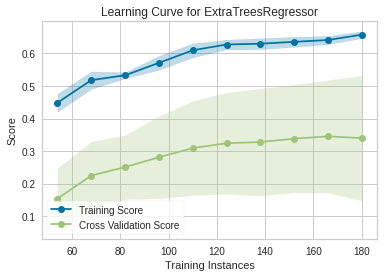

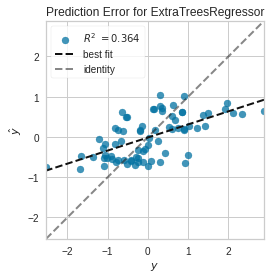

In [170]:
plot_model(tuned_reg_model, plot = 'learning')
plot_model(tuned_reg_model, plot = 'error')

# RUNNING THE REAL DATA
### Runtime: 2s


---


1.   Finalizes model
2.   Loads in file initializing forecasting
3.   Finds predictions in Z-scores
4.   Converted Z-scores to actual amounts
5.   Saved in appropriate CSV file




In [171]:
final_model = finalize_model(tuned_reg_model)

In [172]:
real_path = INPUT_RESULTS
realdf=pd.read_csv(real_path)
print(realdf)

    financial_active  net_payment_behaviour_tripdC  \
0          -4.317707                     -0.234884   
1          -4.317707                     -0.234884   
2          -4.317707                     -0.234884   
3          -4.317707                     -0.234884   
4          -4.317707                     -0.234884   
5          -4.317707                     -0.234884   
6          -4.317707                     -0.234884   
7          -4.317707                     -0.234884   
8          -4.317707                     -0.234884   
9          -4.317707                     -0.234884   
10         -4.317707                     -0.234884   
11         -4.317707                     -0.234884   
12         -4.317707                     -0.234884   

    net_payment_behaviour_tripdD  net_payment_behaviour_tripdI  \
0                      -1.924817                     -0.967263   
1                      -1.924817                     -0.967263   
2                      -1.924817             

In [173]:
# These are the predictions in terms of Z-score
z_predictions = predict_model(final_model, realdf).iloc[:,-1]
print(z_predictions)

0    -0.303869
1    -0.303869
2     0.869951
3     0.869951
4     0.869951
5     0.869951
6     0.878632
7     0.873185
8     0.873185
9     0.845251
10    0.875500
11    0.875500
12    0.875500
Name: prediction_label, dtype: float64


In [174]:
n = START_AMT
accounts_charged_off = list()

# Iterates through the predictions and tracks charge offs
for mo_z in z_predictions:
  charge_off_proportion = (mo_z*Z_STDEV)+Z_MEAN
  charge_off = int(charge_off_proportion * n)
  n -= charge_off
  accounts_charged_off.append(charge_off)

print(accounts_charged_off)


[55, 55, 67, 67, 67, 67, 66, 66, 66, 65, 65, 65, 65]


In [175]:
# Updates output
OUTPUT_MOS['accounts_charged_off'] = accounts_charged_off[:-1]
print(OUTPUT_MOS)

     Month  accounts_charged_off
0   202002                    55
1   202003                    55
2   202004                    67
3   202005                    67
4   202006                    67
5   202007                    67
6   202008                    66
7   202009                    66
8   202010                    66
9   202011                    65
10  202012                    65
11  202101                    65


In [176]:
# Saved to output file
OUTPUT_MOS.to_csv(OUTPUT_FILEPATH, index = False, encoding='utf-8')